In [99]:
#Import Dependencies
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import scipy.stats as stats

In [100]:
customer_shopping_data_csv = Path("./Resources/source/customer_shopping_data.csv")

customer_shopping_data_df = pd.read_csv(customer_shopping_data_csv)
customer_shopping_data_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,4,16107.36,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,220.54,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,180.43,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,848.38,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,1,10.18,Cash,24/10/2021,Kanyon


In [101]:

print(len(customer_shopping_data_df))
print(customer_shopping_data_df["invoice_no"].nunique())
print(customer_shopping_data_df["customer_id"].nunique())


99457
99457
99457


Conclusions:
1. One row corresponds to one invoice, meaning we cannot analyze joint purchases by a person, for example, food + toys.
2. One row corresponds to one customer, meaning we cannot track the behavior of an individual customer, their different purchases, or mall visit dates.
Regarding customers, it's logical that when you check out at a store, you are not identified (especially if there is no card payment), but then it's unclear why this was included in the dataset.


In [102]:
#The distribution of records by the gender of the buyer shows a ratio of 60:40.
customer_shopping_data_df.groupby("gender").size()

gender
Female    59482
Male      39975
dtype: int64

Conclusion: The dataset is significantly biased towards women. Therefore, when analyzing the total purchase value, total number of purchases, or number of mall visits between women and men, it will be necessary to introduce a correction factor. Otherwise, women will always appear to make more purchases and visit more often. Alternatively, analyze individual transactions of women and men separately, in which case a correction factor is not needed.


In [103]:
#Distribution by payment method.
customer_shopping_data_df.groupby("payment_method").size()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

Conclusion: The amount of data for each method is sufficient for analysis.

In [104]:
#The distribution of records by product categories shows that there are 2 categories with 5k records each, 
#2 categories with 10k records each, 2 categories with 15k records each, and 1 category with 35k records.
customer_shopping_data_df.groupby("category").size()

category
Books               4981
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Toys               10087
dtype: int64

Conclusion: There is a sufficient number of transactions in each category for analysis.







In [105]:
#Distribution by the number of purchases of one product category per invoice.
customer_shopping_data_df.groupby("quantity").size()

quantity
1     31387
2     23309
3     11594
4      8668
5      6855
6      4025
7      2674
8      2515
9      1537
10     1010
11      493
12      628
13      425
14      592
15      549
16      528
17      467
18      549
19      432
20      525
21      224
22      215
23      120
24       77
25       36
26       18
28        4
29        1
dtype: int64

Conclusion: The distribution is highly artificial, with everyone uniformly buying no more than 5 items in one category. This is very strange for products and beverages.

In [106]:
#Distribution by malls.
customer_shopping_data_df.groupby("shopping_mall").size()

shopping_mall
Cevahir AVM           4991
Emaar Square Mall     4811
Forum Istanbul        4947
Istinye Park          9781
Kanyon               19823
Mall of Istanbul     19943
Metrocity            15011
Metropol AVM         10161
Viaport Outlet        4914
Zorlu Center          5075
dtype: int64

Conclusion: Each mall has a sufficient number of transactions for analysis, but the malls themselves are not equally visited. They can be roughly categorized into 5k, 10k, and 20k categories, assuming that within each category, the number of visits should be the same, for example, strictly 5k. Next, using a chi-square test, we can determine whether the fluctuations are random or not. For instance, if we have visit counts of 4991, 4811, 4947, 4914, and 5075, we can analyze whether these fluctuations are significant. Another idea is to analyze whether certain malls are preferred more by women or men. To do this, we need to calculate the proportion of women and men in each mall and compare it to the overall distribution we found earlier, which was 60:40.

In [107]:
customer_shopping_data_df["invoice_date"] = pd.to_datetime(customer_shopping_data_df["invoice_date"], format="%d/%m/%Y").dt.date

print(customer_shopping_data_df["invoice_date"].min())
print(customer_shopping_data_df["invoice_date"].max())
print(customer_shopping_data_df["invoice_date"].nunique())

2021-01-01
2023-03-08
797


In [108]:
customer_shopping_data_df.groupby("age").size()

age
18    1844
19    1936
20    1844
21    1947
22    2051
23    1897
24    1977
25    1863
26    1896
27    1950
28    1953
29    1885
30    1981
31    1866
32    1891
33    1913
34    1883
35    1841
36    1954
37    2057
38    1954
39    1947
40    1960
41    1892
42    1892
43    2000
44    1904
45    1876
46    1911
47    1880
48    1955
49    1883
50    1873
51    1993
52    1945
53    1903
54    1830
55    1843
56    1916
57    1879
58    1875
59    1874
60    1874
61    1945
62    1909
63    1886
64    2002
65    1856
66    1876
67    1901
68    1893
69    1901
dtype: int64

F_onewayResult(statistic=5480.716589764455, pvalue=0.0)


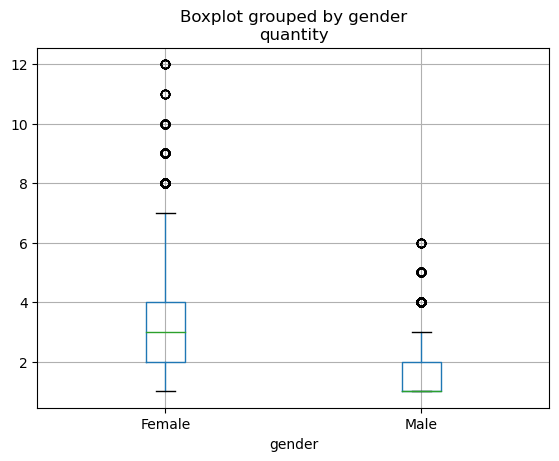

In [109]:
df = customer_shopping_data_df[(customer_shopping_data_df["category"] == "Cosmetics")]

#Create a boxplot
df.boxplot(column="quantity", by="gender")

#Perform the ANOVA-test. 

for bucket, group in df.groupby("gender"):
    buckets.append(group["quantity"])

print(stats.f_oneway(*buckets))

plt.show()

`p-value`=0.5289850685939056 > 0.05 - meaning we cannot reject H0, which states that there are no differences.
Conclusion: Women and men buy the same quantity of cosmetics (in one transaction).

F_onewayResult(statistic=804.8180207577258, pvalue=1.5685521281641089e-172)


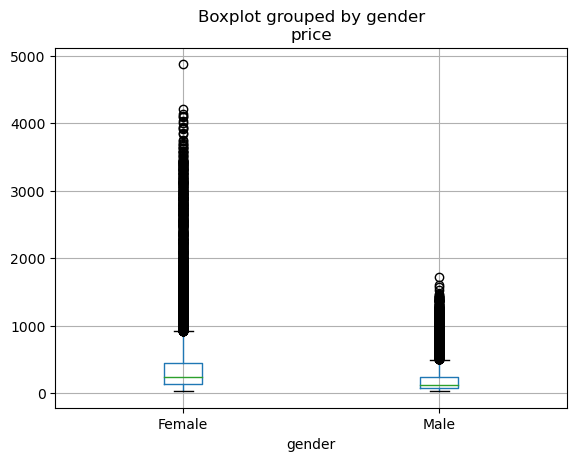

In [110]:
#I assume that inflation affects prices, so the results will be biased. However, 
#Analyzing the overall picture and assume that inflation affects men's and women's cosmetics equally. 
#Inflation will be critical for analyzing seasonal fluctuations.
df = customer_shopping_data_df[(customer_shopping_data_df["category"] == "Cosmetics")]
df.boxplot(column="price", by="gender")
buckets = [] 

for bucket, group in df.groupby("gender"):
    buckets.append(group["price"])

print(stats.f_oneway(*buckets))

plt.show()

H0 - There is no difference in the average price of one unit of cosmetics between women and men.

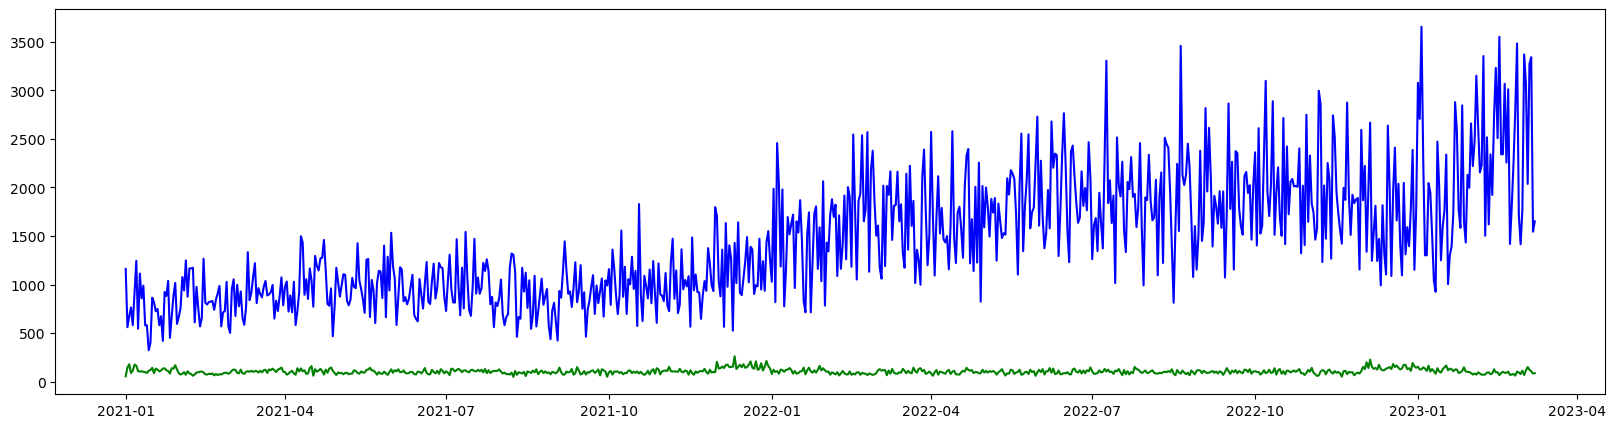

In [111]:
#Analyzing the relationship between the average price and total quantity of purchases over the entire period covered by our dataset.

filtered_df = customer_shopping_data_df[(customer_shopping_data_df["category"] == "Clothing")]

df = filtered_df.groupby(["invoice_date"]).agg({"price": "mean", "quantity": "sum"})
df.reset_index(inplace=True)

plt.figure(figsize=(20, 5))
plt.plot(df["invoice_date"], df["price"], color="blue")
plt.plot(df["invoice_date"], df["quantity"], color="green")

plt.show()



Conclusions:
1. The quantity of goods per day is almost independent of the date, but there are small periods of peaks and dips.
2. The average price (in lira) remains constant over time (!), showing no seasonal fluctuations or inflation.